In [2]:
import sys
import os

# Add the path to `database_scripts` folder
sys.path.append(os.path.abspath("../database_scripts"))
import db_utils as du
import create_tables as ct


conn = ct.create_or_open_database()
df_fahrrad_Zähler = du.fetch_data_df('Standorten_Zählstelle',conn)
df_mess_Fahrrad= du.fetch_data_df('Messdaten_Fahrrad',conn)
df_bezirke= du.fetch_data_df('Bezirke',conn)
df_date = du.fetch_data_df('Date_dim',conn)
df_time = du.fetch_data_df('Time_dim',conn)

Establish SQLite connection.


In [2]:
# in order to make fetching data from the database faster:
# creation of index for messdaten_auto und messDaten_Fahrrad
# conn.isolation_level = None # deaktiviert Autocommit
#try to use chunksize in the fetch_data . but we have to define parameter 

C:\Users\user\AppData\Local\Temp\ipykernel_50888\2061097483.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bezirk', y='Anzahl_Zählstelle', data=counts, palette='viridis')


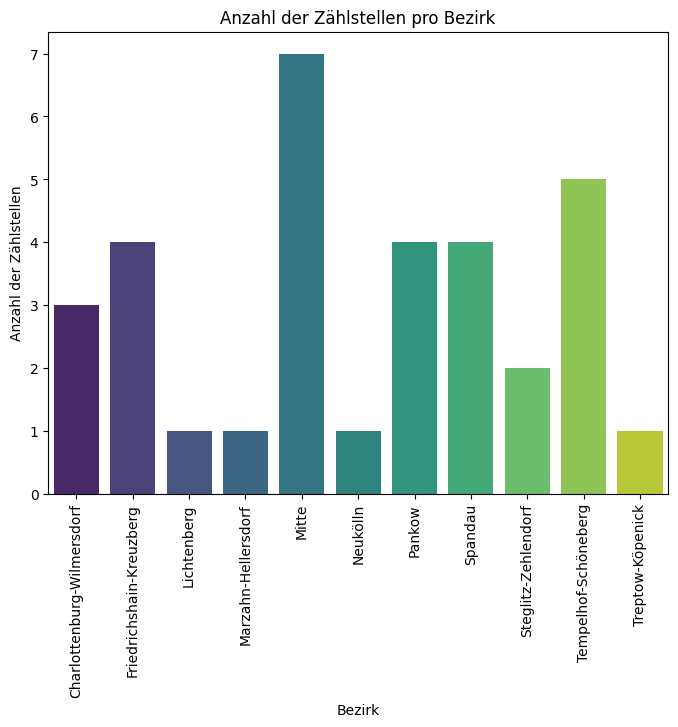

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count the number of Zählstelle per Bezirk

df_merged = pd.merge(df_fahrrad_Zähler, df_bezirke, on="Bezirk", how="inner")
counts = df_merged.groupby('Bezirk')['Zählstelle'].count().reset_index()
counts.rename(columns={'Zählstelle': 'Anzahl_Zählstelle'}, inplace=True)

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Bezirk', y='Anzahl_Zählstelle', data=counts, palette='viridis')

# Add labels and title
plt.xlabel('Bezirk')
plt.xticks(rotation=90)
plt.ylabel('Anzahl der Zählstellen')
plt.title('Anzahl der Zählstellen pro Bezirk')

# Display the plot
plt.show()


In [3]:
import pandas as pd
df_merged = pd.merge(df_fahrrad_Zähler, df_bezirke, on="Bezirk", how="inner")

df_merged = pd.merge(df_merged, df_mess_Fahrrad, on="Zählstelle", how="inner")

# Merge with Date_dim on Installationsdatum and Date
df_merged = pd.merge(df_merged, df_date, on="DateID", how="inner")

# Merge with time_dim on Installationsdatum time
df_merged = pd.merge(df_merged, df_time, on='TimeID', how="inner")

# Display the merged da
df_merged.head()

,Zählstelle,Bezirk,Beschreibung,Installationsdatum,Breitengrad,Längengrad,Geometry,DateID,TimeID,Wert,Date,year,month,day,day_of_the_week,is_holiday,quarter,time_of_the_day
0,12-PA-SCH,Pankow,Schwedter Steg,2012-03-01 00:00:00,52.597193,13.440249,"MULTIPOLYGON (((13.3883808 52.5676794, 13.3884...",1,0,14.0,01.01.2018,2018,1,1,0,1,1,nachts
1,12-PA-SCH,Pankow,Schwedter Steg,2012-03-01 00:00:00,52.597193,13.440249,"MULTIPOLYGON (((13.3883808 52.5676794, 13.3884...",1,1,16.0,01.01.2018,2018,1,1,0,1,1,nachts
2,12-PA-SCH,Pankow,Schwedter Steg,2012-03-01 00:00:00,52.597193,13.440249,"MULTIPOLYGON (((13.3883808 52.5676794, 13.3884...",1,2,7.0,01.01.2018,2018,1,1,0,1,1,nachts
3,12-PA-SCH,Pankow,Schwedter Steg,2012-03-01 00:00:00,52.597193,13.440249,"MULTIPOLYGON (((13.3883808 52.5676794, 13.3884...",1,3,13.0,01.01.2018,2018,1,1,0,1,1,nachts
4,12-PA-SCH,Pankow,Schwedter Steg,2012-03-01 00:00:00,52.597193,13.440249,"MULTIPOLYGON (((13.3883808 52.5676794, 13.3884...",1,4,1.0,01.01.2018,2018,1,1,0,1,1,morgens


In [4]:
df_merged.columns

Index(['Zählstelle', 'Bezirk', 'Beschreibung', 'Installationsdatum',
       'Breitengrad', 'Längengrad', 'Geometry', 'DateID', 'TimeID', 'Wert',
       'Date', 'year', 'month', 'day', 'day_of_the_week', 'is_holiday',
       'quarter', 'time_of_the_day'],
      dtype='object')

In [5]:
df_merged.drop(columns=['Installationsdatum', 'Breitengrad', 'Längengrad', 'Geometry'],axis=1,  inplace= True)


In [6]:
df_merged.head()

,Zählstelle,Bezirk,Beschreibung,DateID,TimeID,Wert,Date,year,month,day,day_of_the_week,is_holiday,quarter,time_of_the_day
0,12-PA-SCH,Pankow,Schwedter Steg,1,0,14.0,01.01.2018,2018,1,1,0,1,1,nachts
1,12-PA-SCH,Pankow,Schwedter Steg,1,1,16.0,01.01.2018,2018,1,1,0,1,1,nachts
2,12-PA-SCH,Pankow,Schwedter Steg,1,2,7.0,01.01.2018,2018,1,1,0,1,1,nachts
3,12-PA-SCH,Pankow,Schwedter Steg,1,3,13.0,01.01.2018,2018,1,1,0,1,1,nachts
4,12-PA-SCH,Pankow,Schwedter Steg,1,4,1.0,01.01.2018,2018,1,1,0,1,1,morgens


In [7]:
df_merged[df_merged['year']==2018]

,Zählstelle,Bezirk,Beschreibung,DateID,TimeID,Wert,Date,year,month,day,day_of_the_week,is_holiday,quarter,time_of_the_day
0,12-PA-SCH,Pankow,Schwedter Steg,1,0,14.0,01.01.2018,2018,1,1,0,1,1,nachts
1,12-PA-SCH,Pankow,Schwedter Steg,1,1,16.0,01.01.2018,2018,1,1,0,1,1,nachts
2,12-PA-SCH,Pankow,Schwedter Steg,1,2,7.0,01.01.2018,2018,1,1,0,1,1,nachts
3,12-PA-SCH,Pankow,Schwedter Steg,1,3,13.0,01.01.2018,2018,1,1,0,1,1,nachts
4,12-PA-SCH,Pankow,Schwedter Steg,1,4,1.0,01.01.2018,2018,1,1,0,1,1,morgens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741498,06-FK-FRA-W,Friedrichshain-Kreuzberg,Frankfurter Allee West,365,19,17.0,31.12.2018,2018,12,31,0,0,4,abends
4741499,06-FK-FRA-W,Friedrichshain-Kreuzberg,Frankfurter Allee West,365,20,13.0,31.12.2018,2018,12,31,0,0,4,abends
4741500,06-FK-FRA-W,Friedrichshain-Kreuzberg,Frankfurter Allee West,365,21,14.0,31.12.2018,2018,12,31,0,0,4,abends
4741501,06-FK-FRA-W,Friedrichshain-Kreuzberg,Frankfurter Allee West,365,22,4.0,31.12.2018,2018,12,31,0,0,4,abends


In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns


#X :Month Y: Wert Hue: Bezirke
df_2018 = df_merged[df_merged['year'] == 2018]

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


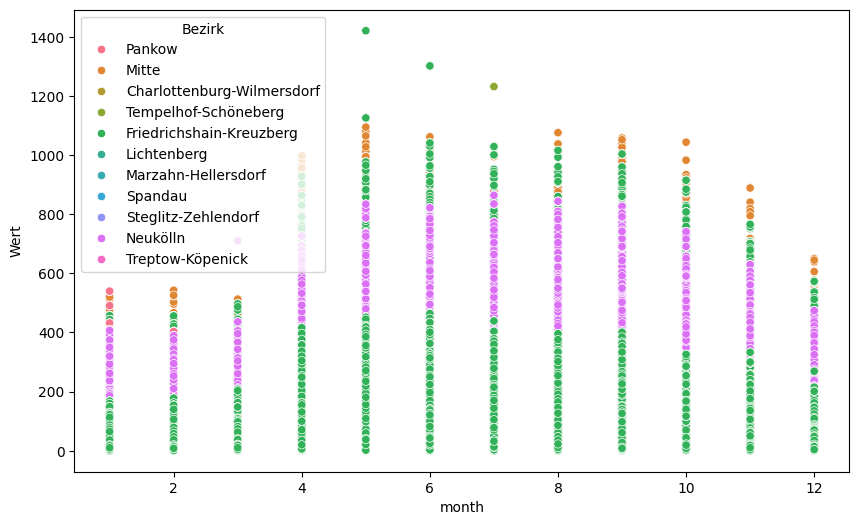

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot( x= df_2018['month'],y=df_2018['Wert'], hue=df_merged['Bezirk'])
plt.show()


In [10]:
df_2018_Mitte=df_2018[df_2018['Bezirk']=='Mitte']

<Axes: xlabel='Wert', ylabel='Count'>

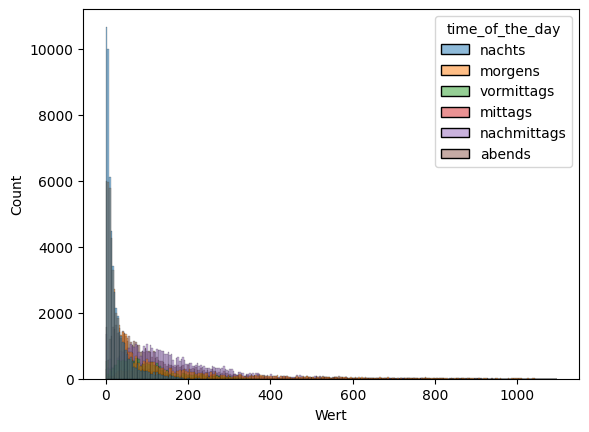

In [9]:

sns.histplot(data=df_2018_Mitte, x='Wert', 
             multiple='layer', stat='count',hue ='time_of_the_day', element='bars')

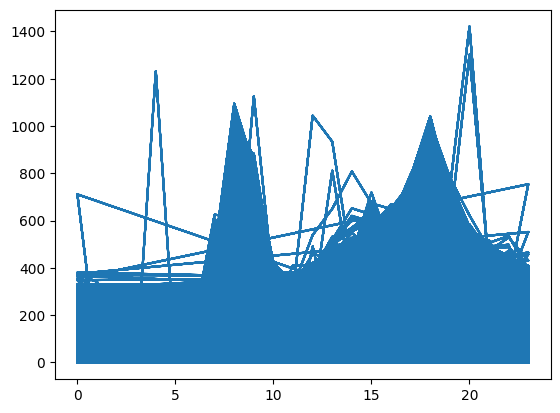

In [10]:
plt.plot(df_2018['TimeID'],df_2018['Wert'])

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.swarmplot( x=df_2018_Mitte['day_of_the_week'], y=df_2018_Mitte['Wert'])

<Axes: xlabel='Wert', ylabel='count'>

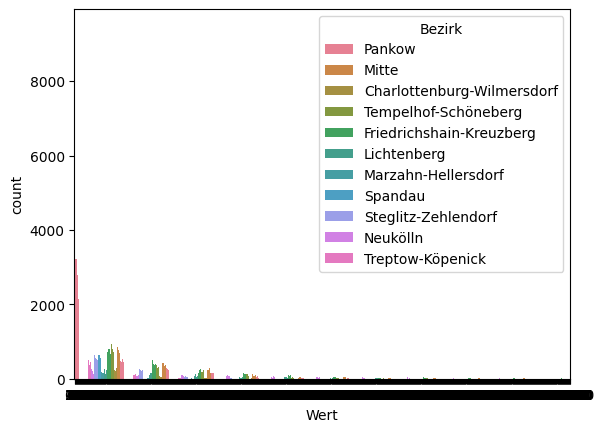

In [7]:
sns.countplot(data=df_2018, x='Wert', hue='Bezirk')

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Bezirk', y='Wert',  data=df_2018, ci=None)
plt.title('Number of User Pro Region')
plt.xlabel('Bezirk')
plt.xticks(rotation=90)
plt.ylabel('Number of Users')
plt.legend(title='Holiday')
plt.show()

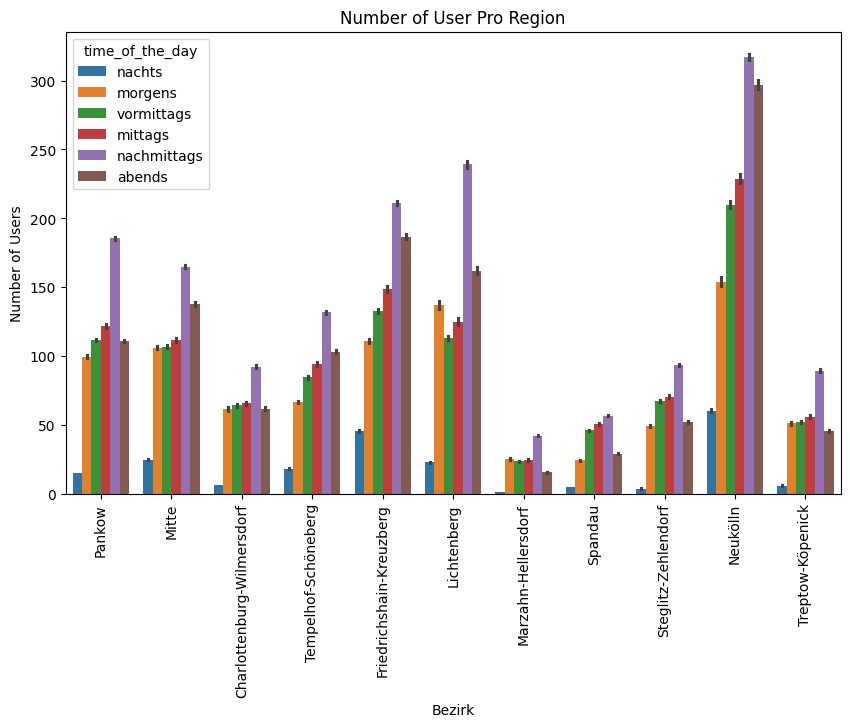

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Bezirk', y='Wert',  data=df_2018,hue='time_of_the_day')
plt.title('Number of User Pro Region')
plt.xlabel('Bezirk')
plt.xticks(rotation=90)
plt.ylabel('Number of Users')
plt.show()

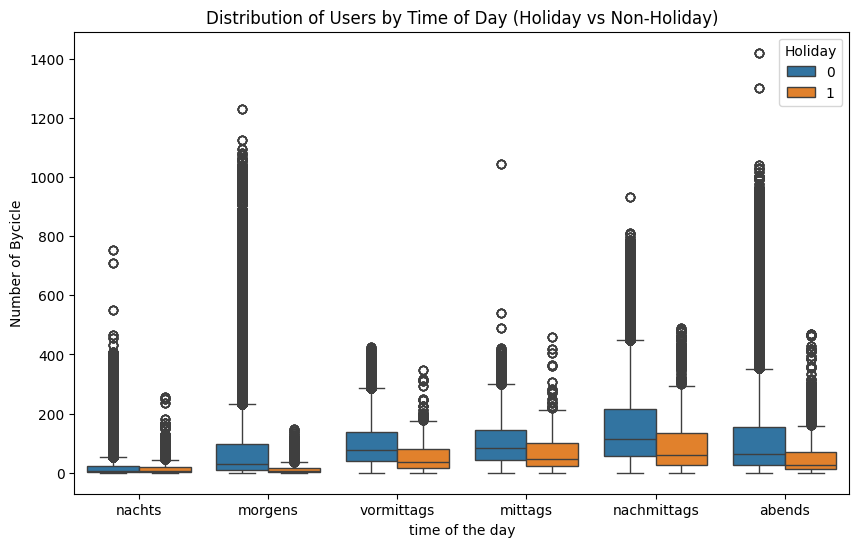

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_of_the_day', y='Wert', hue='is_holiday', data=df_2018)
plt.title('Distribution of Users by Time of Day (Holiday vs Non-Holiday)')
plt.xlabel('time of the day')
plt.ylabel('Number of Bycicle')
plt.legend(title='Holiday')
plt.show()


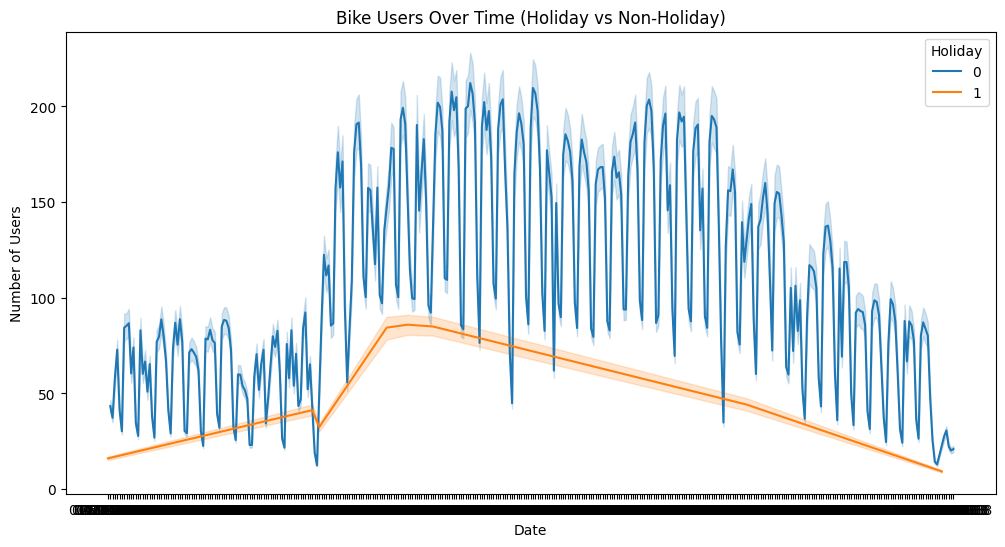

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Wert', hue='is_holiday', data=df_2018_Mitte)
plt.title('Bike Users Over Time (Holiday vs Non-Holiday)')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend(title='Holiday')
plt.show()


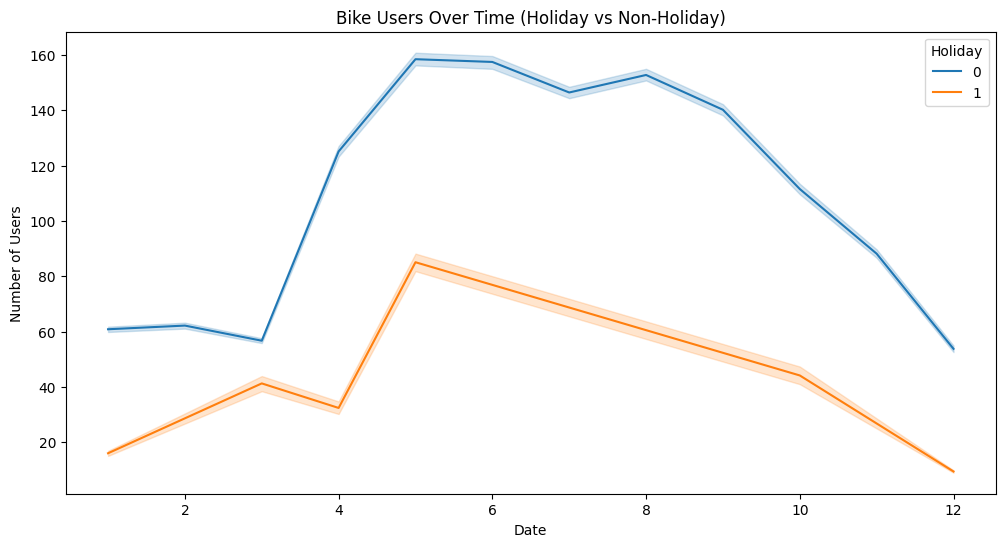

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Wert', hue='is_holiday', data=df_2018_Mitte)
plt.title('Bike Users Over Time (Holiday vs Non-Holiday)')
plt.xlabel('month')
plt.ylabel('Number of Users')
plt.legend(title='Holiday')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_50888\4168915655.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='time_of_the_day', y='Wert', hue='is_holiday', data=df_2018_Mitte, ci=None)


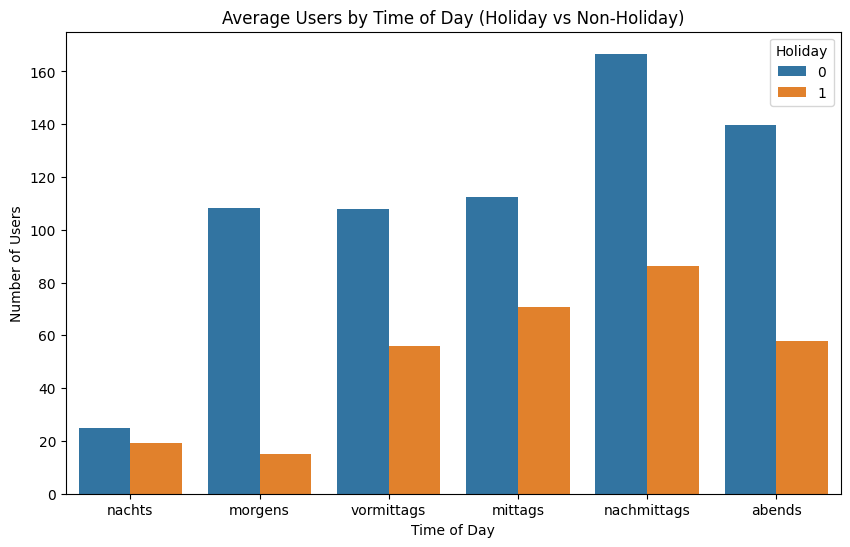

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_the_day', y='Wert', hue='is_holiday', data=df_2018_Mitte, ci=None)
plt.title('Average Users by Time of Day (Holiday vs Non-Holiday)')
plt.xlabel('Time of Day')
plt.ylabel('Number of Users')
plt.legend(title='Holiday')
plt.show()

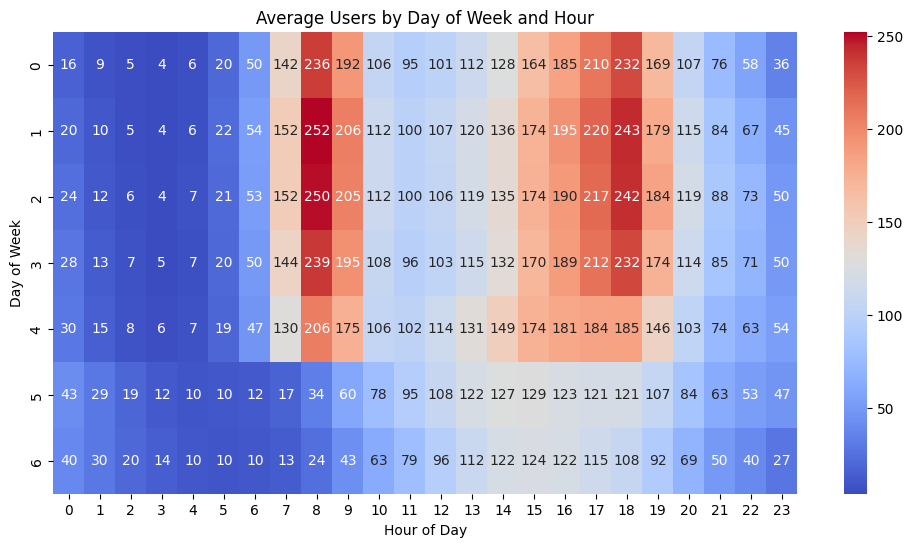

In [21]:
# Pivot table: rows = day, columns = hour, values = mean users
pivot = df_2018.pivot_table(values='Wert', index='day_of_the_week', columns='TimeID', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Average/Density Users by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Function to process and visualize data chunks
def process_chunk(chunk):
    # Here you can perform any data manipulations or visualizations
    # Example: Calculate mean for 'q_pkw_mq_hr' grouped by 'DateID' and 'stunde'
    aggregated_data = chunk.groupby(['DateID', 'stunde'])['q_pkw_mq_hr'].mean().reset_index()

    # Example Visualization: Plotting the mean 'q_pkw_mq_hr' over time
    plt.figure(figsize=(10, 6))
    plt.plot(aggregated_data['stunde'], aggregated_data['q_pkw_mq_hr'], label="Average q_pkw_mq_hr")
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average q_pkw_mq_hr')
    plt.title('Average q_pkw_mq_hr by Hour of the Day')
    plt.legend()
    plt.show()


In [ ]:

import db_utils as du
chunks = du.fetch_data_df_chunk(conn,'Messdaten_Fahrrad')

# Step 4: Process and visualize each chunk
for chunk in chunks:
    process_chunk(chunk)